In [5]:
import numpy as np
import xarray as xr
from xmitgcm import open_mdsdataset
from scipy.interpolate import interp2d
import os.path as op
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ddir = '/swot/SUM05/takaya/MITgcm/channel/runs'

In [3]:
ys, dy = (20,10)
dt = 3e2
ts = int(360*86400*ys/dt+288)
te = int(360*86400*(ys+dy)/dt+288)
print(ts,te)
ds = open_mdsdataset(op.join(ddir,'deepML-2mon_5kmTtave'), grid_dir=op.join(ddir,'5km_grid'),
                     iters=range(ts-288+8640,te,8640),
                     prefix=['Ttave'], delta_t=dt
                    )
ds

2073888 3110688


/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = X
  warnings.warn("Not sure what to do with rlev = " + rlev)
/home/takaya/xmitgcm/xmitgcm/mds_store.py:235: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


<xarray.Dataset>
Dimensions:  (XC: 200, XG: 200, YC: 400, YG: 400, Z: 76, Zl: 76, Zp1: 77, Zu: 76, time: 120)
Coordinates:
  * XC       (XC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * YC       (YC) >f4 2500.0 7500.0 12500.0 17500.0 22500.0 27500.0 32500.0 ...
  * XG       (XG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * YG       (YG) >f4 0.0 5000.0 10000.0 15000.0 20000.0 25000.0 30000.0 ...
  * Z        (Z) >f4 -0.5 -1.57 -2.79 -4.185 -5.78 -7.595 -9.66 -12.01 ...
  * Zp1      (Zp1) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
  * Zu       (Zu) >f4 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 -16.1 ...
  * Zl       (Zl) >f4 0.0 -1.0 -2.14 -3.44 -4.93 -6.63 -8.56 -10.76 -13.26 ...
    rA       (YC, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dxG      (YG, XC) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    dyG      (YC, XG) >f4 dask.array<shape=(400, 200), chunksize=(400, 200)>
    Depth    (YC,

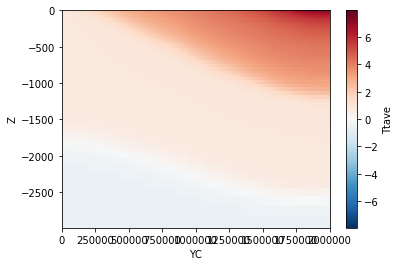

In [4]:
Tclim = ds.Ttave.mean(['time','XC'])
Tclim.plot()

In [6]:
Tclim.to_dataset(name='theta').to_netcdf(op.join(ddir,'ZeroRes_temp_5km_20-29yrs.nc'))